In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install PyPDF2
!pip install docx2txt

     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61085 sha256=eb1015cad33505c6ffa3ae1db7a2e3b1df4c6bbcfbdb5220debcc233f299fc85
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3965 sha256=e67bc3803c3db5a58417a5f180838fe606184a56f352ce6ec411fc15c75e78a2
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt


In [0]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import networkx as nx

In [0]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [0]:
def readDoc():
    name = '/content/drive/My Drive/work/RFP-Corporate-Agency-Arrangement-for-Standalone-Health-Insurance-Business.pdf'
    print('You have asked for the document {}'.format(name))
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)   
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [0]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

You have asked for the document /content/drive/My Drive/work/RFP-Corporate-Agency-Arrangement-for-Standalone-Health-Insurance-Business.pdf
2
<class 'str'>
The length of the file is: 453


In [0]:
def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [0]:
sentences_list = tokenize(document)
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 96
The size of the item 0 in Bytes is: 499


In [0]:
print(type(sentences_list))

<class 'list'>


In [0]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 1


In [0]:
for i in sentences_list:
    print(i)

 
 
 
Request 
f
or Proposal (RFP)
 
For
 
Corporate Agency Arrangement for
 
General (03) and Standalone Health Insurance Business (01) 
 
 
Reference Number
 
:
 
IDBI Bank/ 2018
-
19/TPD/CA/RFP/01
 
Dated
 
 
            
:
 
22.02.2019
 
Issued By
 
 
:
 
IDBI Bank Limited
 
Head Office
 
 
:
 
Corporate Centre, Mumbai, IDBI Towers, World Trade
 
                                       
Centre
 
Complex, Cuffe Parade, Colaba, Mumbai
-
 
400005


In [0]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [0]:
cv_demo = CountVectorizer() 
text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am', 'are', 'ashish', 'bad', 'good', 'is', 'not', 'you']


In [0]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <1x43 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['01', '02', '03', '19', '2018', '2019', '22', '400005', 'agency', 'and', 'arrangement', 'bank', 'business', 'by', 'ca', 'centre', 'colaba', 'complex', 'corporate', 'cuffe', 'dated', 'for', 'general', 'head', 'health', 'idbi', 'insurance', 'issued', 'limited', 'mumbai', 'number', 'office', 'or', 'parade', 'proposal', 'reference', 'request', 'rfp', 'standalone', 'towers', 'tpd', 'trade', 'world']
[[2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 3 1 1 1 2 1 1 1 1 1 1
  1 2 1 1 1 1 1]]


In [0]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.23570226 0.11785113 0.11785113 0.11785113 0.11785113 0.11785113
  0.11785113 0.11785113 0.11785113 0.11785113 0.11785113 0.23570226
  0.11785113 0.11785113 0.11785113 0.23570226 0.11785113 0.11785113
  0.23570226 0.11785113 0.11785113 0.23570226 0.11785113 0.11785113
  0.11785113 0.35355339 0.11785113 0.11785113 0.11785113 0.23570226
  0.11785113 0.11785113 0.11785113 0.11785113 0.11785113 0.11785113
  0.11785113 0.23570226 0.11785113 0.11785113 0.11785113 0.11785113
  0.11785113]]


In [0]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <43x1 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Column format>>


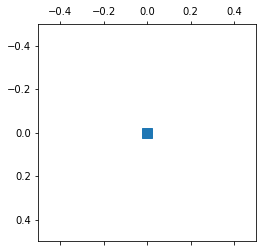

In [0]:
plt.spy(res_graph)

Number of edges 1
Number of vertices 1


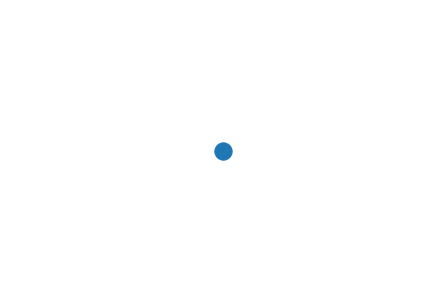

The memory used by the graph in Bytes is: 56


In [0]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [0]:

# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 240
0 1.0


In [0]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [0]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [0]:
print(rank_max)
print(rank_min)

1.0
1.0


In [0]:
temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

1


In [0]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [0]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [0]:
model = sentence_list

In [0]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

 
 
 
Request 
f
or Proposal (RFP)
 
For
 
Corporate Agency Arrangement for
 
General (03) and Standalone Health Insurance Business (01) 
 
 
Reference Number
 
:
 
IDBI Bank/ 2018
-
19/TPD/CA/RFP/01
 
Dated
 
 
            
:
 
22.02.2019
 
Issued By
 
 
:
 
IDBI Bank Limited
 
Head Office
 
 
:
 
Corporate Centre, Mumbai, IDBI Towers, World Trade
 
                                       
Centre
 
Complex, Cuffe Parade, Colaba, Mumbai
-
 
400005


<function TextIOWrapper.close>

In [0]:
for lines in sentence_list:
    print(lines)

 
 
 
Request 
f
or Proposal (RFP)
 
For
 
Corporate Agency Arrangement for
 
General (03) and Standalone Health Insurance Business (01) 
 
 
Reference Number
 
:
 
IDBI Bank/ 2018
-
19/TPD/CA/RFP/01
 
Dated
 
 
            
:
 
22.02.2019
 
Issued By
 
 
:
 
IDBI Bank Limited
 
Head Office
 
 
:
 
Corporate Centre, Mumbai, IDBI Towers, World Trade
 
                                       
Centre
 
Complex, Cuffe Parade, Colaba, Mumbai
-
 
400005
